In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

import warnings
warnings.filterwarnings('ignore')

---

# Facebook

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2222,3/19/2021,281.220001,292.799988,281.200012,290.109985,290.109985,38905100
2223,3/22/2021,290.450012,299.709992,286.750000,293.540008,293.540008,28273100
2224,3/23/2021,293.149994,298.000000,289.809998,290.630005,290.630005,23000900
2225,3/24/2021,291.000000,291.720001,281.160004,282.140015,282.140015,18675000


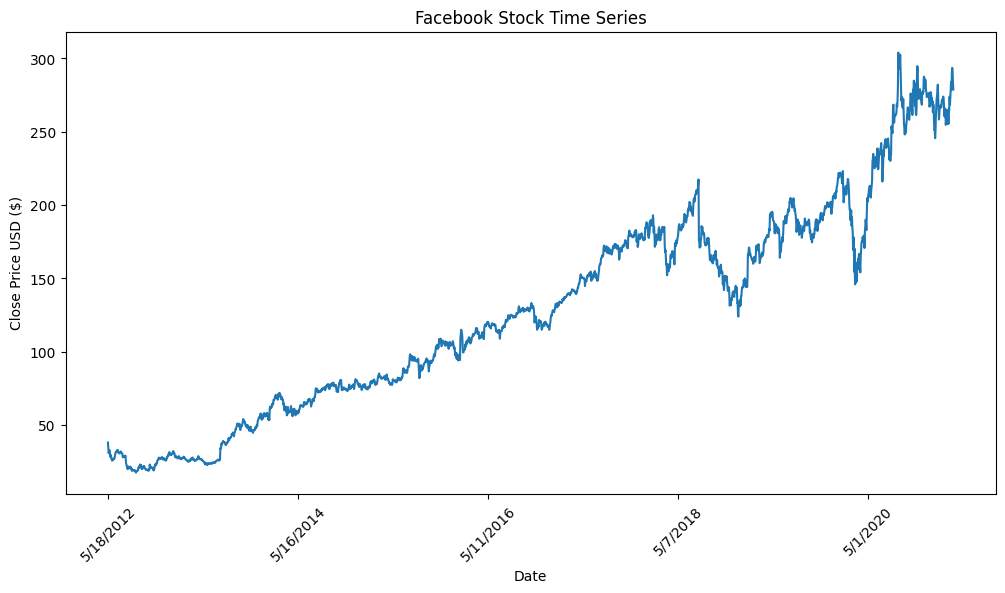

In [2]:
facebook = pd.read_csv("Facebook.csv")
company = facebook.copy()
companyName = 'Facebook'
display(company)

plt.figure(figsize=(12, 6))
plt.plot(company['Date'], company['Close'])
plt.title('Facebook Stock Time Series')
plt.xticks(range(0, company.shape[0], 500), company['Date'].loc[::500], rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [3]:
# # Kalman Filter
# from pykalman import KalmanFilter

# # khởi tạo các giá trị đầu tiên có ma trận là 1, sau đó cập nhật lại giá trị
# kf = KalmanFilter(transition_matrices = [1], observation_matrices=[1], initial_state_mean=0, initial_state_covariance=1, observation_covariance=1, transition_covariance=0.0001)
# mean, cov = kf.filter(company['Close'])
# mean = mean.flatten()
# cov = cov.flatten()
# # display(mean)
# # display(mean.shape)
# # display(cov)
# # display(cov.shape)

# # DeTrend Time Series
# plt.figure(figsize=(12, 6))
# plt.plot(company['Close'].values-mean, 'red', lw=2)
# plt.title('Facebook Kalman Filtered Time Series')
# plt.xticks(range(0, company.shape[0], 500), company['Date'].loc[::500], rotation=45)
# plt.xlabel('Date')
# plt.ylabel('Close Stock Price after Detrend')
# plt.show()

##  Not Using Kalman

In [4]:
data = company.filter(['Open'])

train_len = int(np.ceil(len(data) * 0.9))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
data

,Open
0,42.049999
1,36.529999
2,32.610001
3,31.370001
4,32.950001
...,...
2222,281.220001
2223,290.450012
2224,293.149994
2225,291.000000


In [5]:
train_data = scaled_data[0:train_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [6]:
display(data.shape)
display(x_train.shape)
display(y_train.shape)

(2227, 1)

(1945, 60)

(1945,)

In [7]:
test_data = scaled_data[train_len - 60:, :]
x_test = []
y_test = data[train_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
display(x_test.shape)
display(y_test.shape)

(222, 60)

(222, 1)

### Using ANN

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

ANN_Model = Sequential()
ANN_Model.add(Dense(units=2**7, activation='relu', input_dim=x_train.shape[1]))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(units=2**6))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(units=1))

ANN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7808      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [10]:
from numpy.random import seed
seed(1)

ANN_Model.compile(optimizer='adam', loss='mean_squared_error')
ANN_Model.fit(x_train, y_train, batch_size=16, epochs=15)

Epoch 1/15
122/122 [==============================] - 3s 4ms/step - loss: 0.0299
Epoch 2/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 4/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5/15
122/122 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 6/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 7/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 8/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 9/15
122/122 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 10/15
122/122 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 11/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 12/15
122/122 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 13/15
122/122 [====

In [11]:
# predict the price

predictions = ANN_Model.predict(x_test)
y_pred = scaler.inverse_transform(predictions)

7/7 [==============================] - 0s 2ms/step


In [12]:
# evaluate the model
model_score = []
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)
display('RMSE: ',rmse)
model_score.append(['ANN', rmse])

'RMSE: '

9.673572223134666

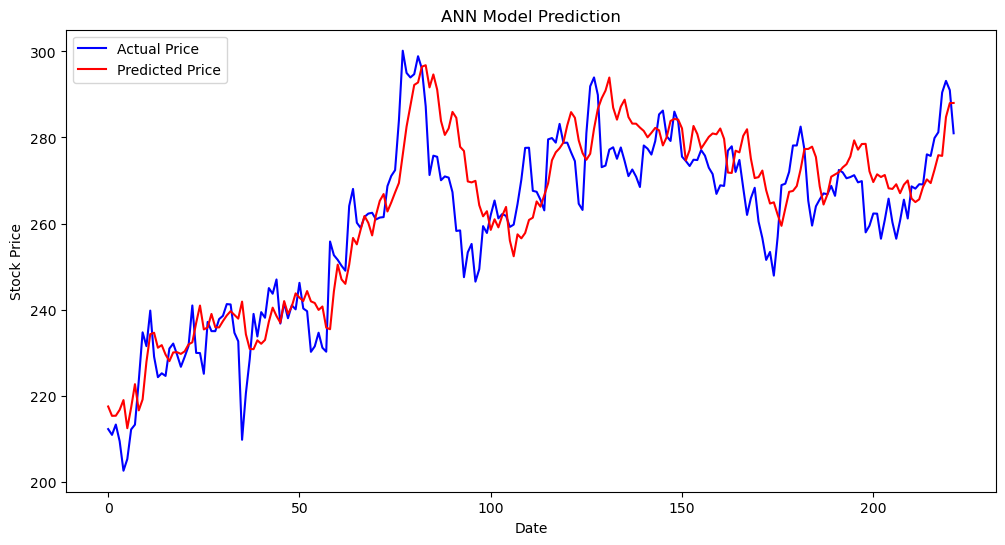

In [13]:
# visualize the result using
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('ANN Model Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



### Using MLP (Multi-Layer Perceptron)

In [14]:
from sklearn.neural_network import MLPRegressor

seed(1)
MLP_Model = MLPRegressor(hidden_layer_sizes=100, activation='relu', solver='adam', alpha=0.01, shuffle=True)
MLP_Model.fit(x_train, y_train)

# predict the price
predictions = MLP_Model.predict(x_test)
y_pred = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred[:5]

array([[198.22878664],
       [193.61551893],
       [198.32484832],
       [201.28368931],
       [202.48865415]])

In [15]:
# evaluate the model
model_score = []
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
display('RMSE: ',rmse)
model_score.append(['MLP', rmse])

'RMSE: '

10.951340349795595

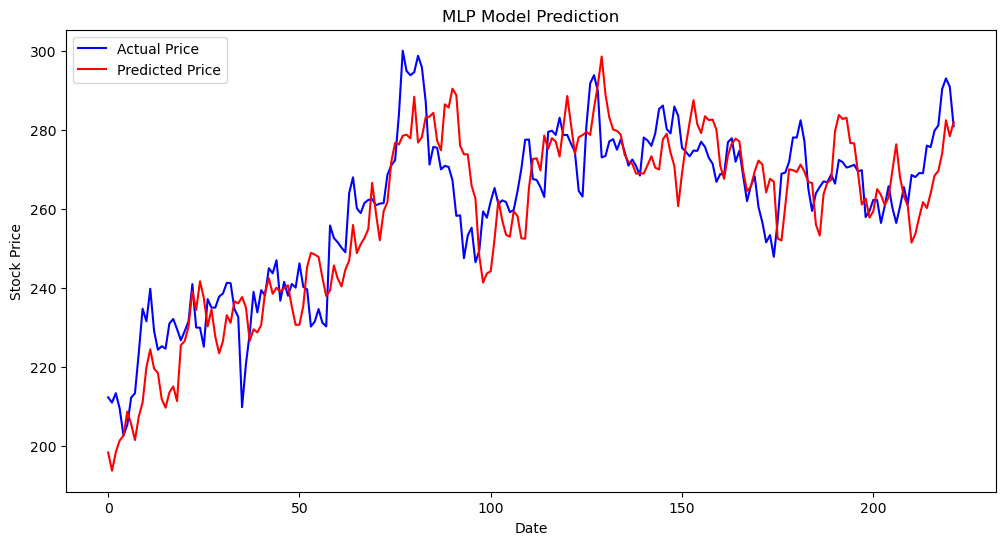

In [16]:
# visualize the result using
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('MLP Model Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [17]:
from sklearn.neural_network import MLPRegressor

seed(1)
MLP_Model = MLPRegressor(hidden_layer_sizes=100, activation='relu', solver='lbfgs', alpha=0.01, shuffle=True)
MLP_Model.fit(x_train, y_train)

# predict the price
predictions = MLP_Model.predict(x_test)
y_pred = scaler.inverse_transform(predictions.reshape(-1, 1))
y_pred[:5]

array([[205.55766952],
       [202.27846255],
       [206.24230352],
       [213.76642352],
       [210.66237733]])

In [18]:
# evaluate the model
model_score = []
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
display('RMSE: ',rmse)
model_score.append(['MLP', rmse])

'RMSE: '

7.886452884254774

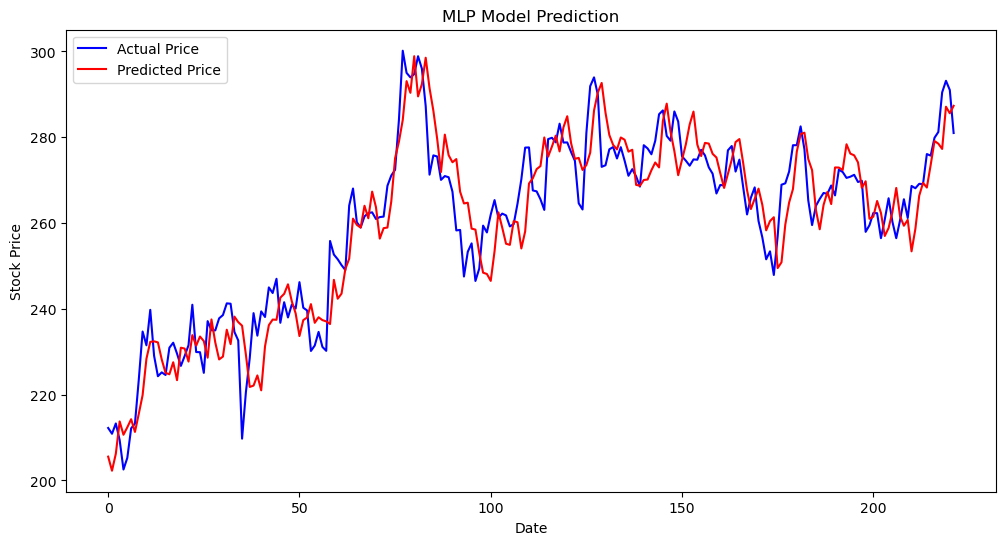

In [19]:
# visualize the result using
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('MLP Model Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
# Using RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

x_train_RNN = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test_RNN = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

seed(1)

RNN_Model = Sequential()
RNN_Model.add(SimpleRNN(units=2**6,input_shape=(x_train_RNN.shape[1], 1)))
RNN_Model.add(Dense(units=1))


RNN_Model.compile(optimizer='adam', loss='mean_squared_error')
RNN_Model.fit(x_train_RNN, y_train, batch_size=3, epochs=5)


Epoch 1/5
649/649 [==============================] - 31s 46ms/step - loss: 4.1911e-04
Epoch 2/5
649/649 [==============================] - 31s 48ms/step - loss: 2.0536e-04
Epoch 3/5
649/649 [==============================] - 30s 47ms/step - loss: 1.6451e-04
Epoch 4/5
649/649 [==============================] - 30s 46ms/step - loss: 1.3511e-04
Epoch 5/5
649/649 [==============================] - 29s 45ms/step - loss: 1.6454e-04


In [21]:
# predict the price
predictions = RNN_Model.predict(x_test_RNN)
y_pred = scaler.inverse_transform(predictions)

# evaluate the model
model_score = []
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)
display('RMSE: ',rmse)
model_score.append(['RNN', rmse])

7/7 [==============================] - 0s 10ms/step


'RMSE: '

6.629689444129179

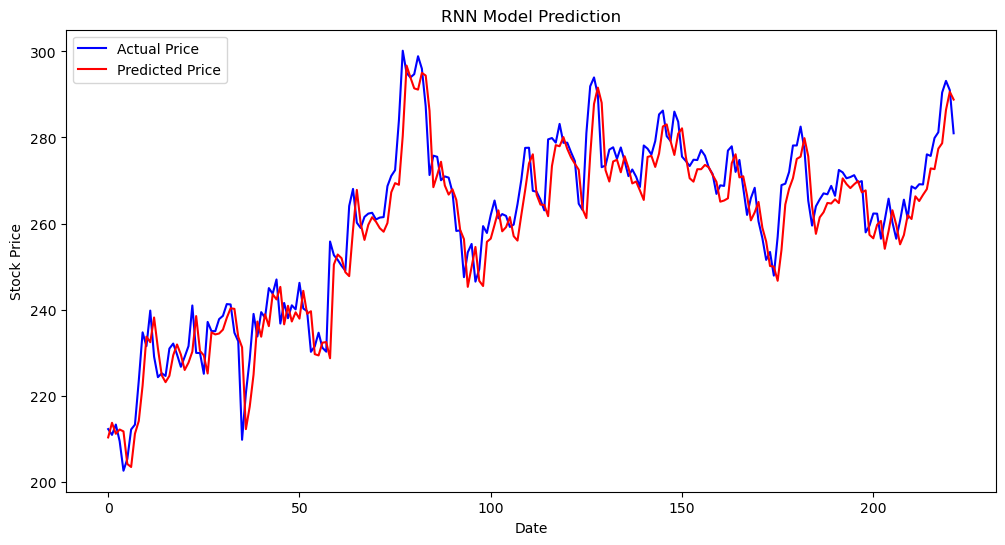

In [22]:
# visualize the result using
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('RNN Model Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [23]:
# Using LSTM

from tensorflow.keras.layers import LSTM

x_train_LSTM = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test_LSTM = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

seed(1)
LSTM_model = Sequential()
# LSTM_model.add(LSTM(units=2**7, input_shape=(x_train_LSTM.shape[1], 1)), return_sequences=True)
# LSTM_model.add(Dropout(0.2))
# LSTM_model.add(LSTM(units=2**5, return_sequences=False))
# LSTM_model.add(Dropout(0.2))
# LSTM_model.add(Dense(units=32))
# LSTM_model.add(Dropout(0.2))
# LSTM_model.add(Dense(units=1))

LSTM_model.add(LSTM(units=2**6, input_shape=(x_train_LSTM.shape[1], 1), return_sequences=True))
LSTM_model.add(LSTM(units=2**5, return_sequences=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(units=1))


LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(x_train_LSTM, y_train, batch_size=1, epochs=7)

Epoch 1/7
1945/1945 [==============================] - 26s 12ms/step - loss: 0.0030
Epoch 2/7
1945/1945 [==============================] - 21s 11ms/step - loss: 0.0015
Epoch 3/7
1945/1945 [==============================] - 22s 12ms/step - loss: 0.0010
Epoch 4/7
1945/1945 [==============================] - 21s 11ms/step - loss: 8.0992e-04
Epoch 5/7
1945/1945 [==============================] - 21s 11ms/step - loss: 7.3224e-04
Epoch 6/7
1945/1945 [==============================] - 21s 11ms/step - loss: 7.7021e-04
Epoch 7/7
1945/1945 [==============================] - 23s 12ms/step - loss: 6.9176e-04


In [24]:
# predict the price
predictions = LSTM_model.predict(x_test_LSTM)
y_pred = scaler.inverse_transform(predictions)

# evaluate the model
model_score = []
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)
display('RMSE: ',rmse)
model_score.append(['RNN', rmse])

7/7 [==============================] - 1s 7ms/step


'RMSE: '

8.616441989376534

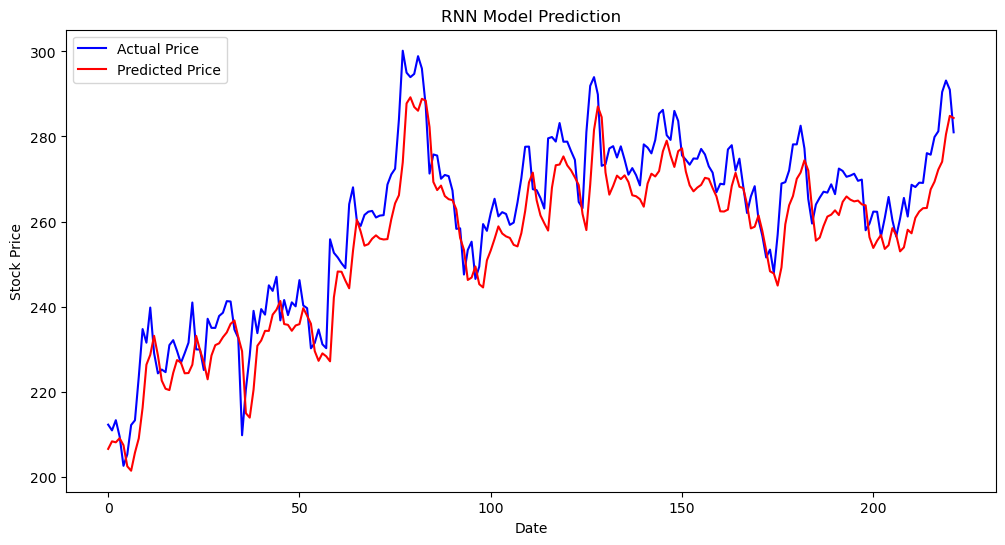

In [25]:
# visualize the result using
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('RNN Model Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

---

# Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,19.070000,19.407499,18.649286,18.942142,16.288403,732292400
1,2012-05-21,19.089287,20.055000,19.073214,20.045713,17.237370,631106000
2,2012-05-22,20.341070,20.495714,19.735001,19.891787,17.105009,694870400
3,2012-05-23,19.910713,20.457144,19.758215,20.377144,17.522364,584897600
4,2012-05-24,20.566786,20.589287,20.043928,20.190001,17.361441,496230000
...,...,...,...,...,...,...,...
2222,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.786530,185549500
2223,2021-03-22,120.330002,123.870003,120.260002,123.389999,123.180771,111912300
2224,2021-03-23,123.330002,124.239998,122.139999,122.540001,122.332214,95467100
2225,2021-03-24,122.820000,122.900002,120.070000,120.089996,119.886360,88530500


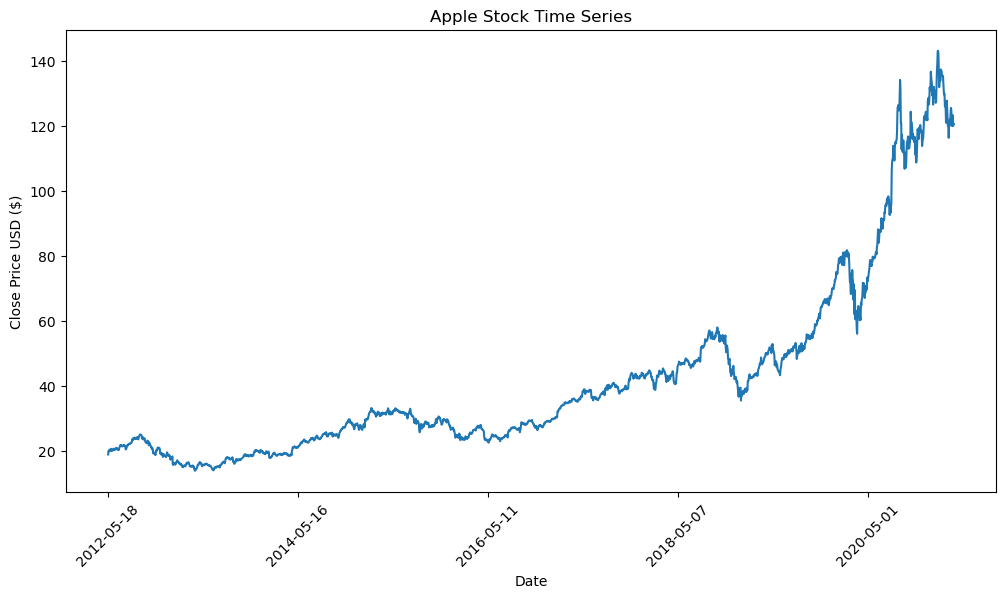

In [26]:
Apple = pd.read_csv("Apple.csv")
company = Apple.copy()
display(company)

plt.figure(figsize=(12, 6))
plt.plot(company['Close'])
plt.title('Apple Stock Time Series')
plt.xticks(range(0, company.shape[0], 500), company['Date'].loc[::500], rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

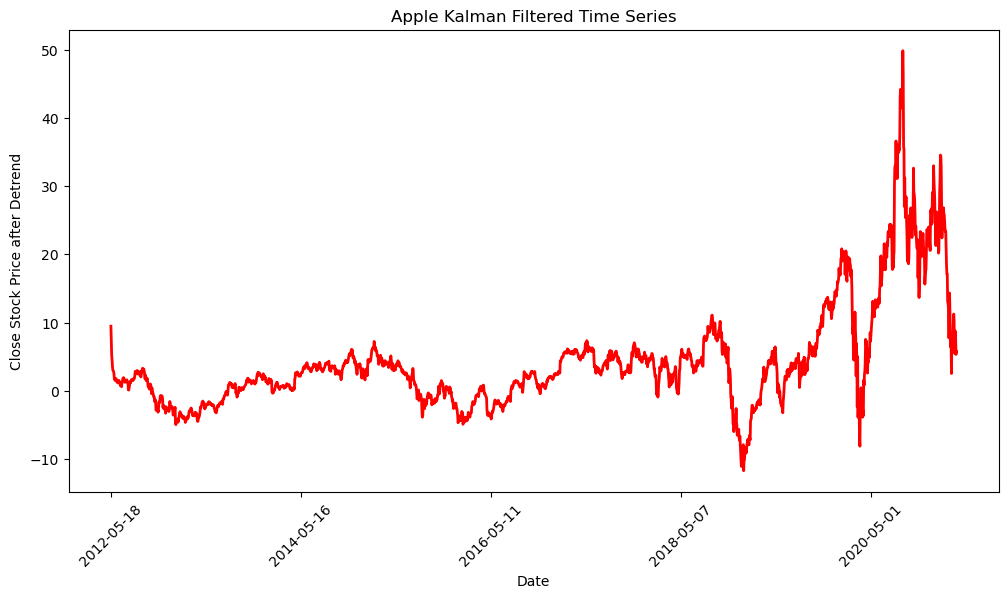

In [27]:
# Kalman Filter
from pykalman import KalmanFilter

# khởi tạo các giá trị đầu tiên có ma trận là 1, sau đó cập nhật lại giá trị
kf = KalmanFilter(transition_matrices = [1], observation_matrices=[1], initial_state_mean=0, initial_state_covariance=1, observation_covariance=1, transition_covariance=0.0001)
mean, cov = kf.filter(company['Close'])
mean = mean.flatten()
cov = cov.flatten()
# display(mean)
# display(mean.shape)
# display(cov)
# display(cov.shape)

# DeTrend Time Series
plt.figure(figsize=(12, 6))
plt.plot(company['Close'].values-mean, 'red', lw=2)
plt.title(f'Apple Kalman Filtered Time Series')
plt.xticks(range(0, company.shape[0], 500), company['Date'].loc[::500], rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Stock Price after Detrend')
plt.show()